In [1]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!cp "glove.6B.zip" "/content"

--2021-02-05 19:04:42--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.02MB/s    in 6m 35s  

2021-02-05 19:11:18 (2.08 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

cp: 'glove.6B.zip' and '/content/glove.6B.zip' are the same file


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
import zipfile

Extract The Zip File That Contain The DataSet

In [3]:
zip_ref = zipfile.ZipFile('glove.6B.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Read The Embedding Words From txt File And Indexing Them

In [4]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector
print(len(embeddings_dict), 'Embedding Words Founded')

400000 Embedding Words Founded


Select Some Embedding Words For Dimension Reduction

In [5]:
tokens = ['spain', 'portugal', 'argentina', 'italy', 'france', 'spanish', 'brazil',
          'mexico', 'madrid', 'morocco', 'netherlands', 'football', 
          'soccer', 'basketball', 'league', 'rugby', 'hockey', 'club', 'team', 'baseball',
          'players', 'player', 'doctor', 'physician', 'nurse', 'dr.', 'doctors', 'patient', 
          'medical', 'hospital', 'surgeon', 'psychiatrist', 'dentist']
words = []
for t in tokens:
  words.append(embeddings_dict[t])
print(len(words), 'Embedding Words Selected')

33 Embedding Words Selected


Use PCA To Reduce The Dimension Of Selected Embedding Words

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.array(words))

Plot The Result Of The PCA 

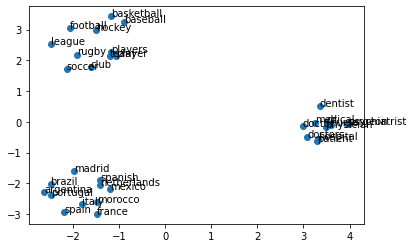

In [7]:
pc1 = principalComponents[:, 0]
pc2 = principalComponents[:, 1]
plt.scatter(pc1, pc2)
for label, x, y in zip(tokens, pc1, pc2):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.savefig('PCAResults1.png')
plt.show()

Find Some Embedding Words That Are Close To The Embedding Words In The Token Categories

In [8]:
token_categories = {'sport': 0, 'iran': 0, 'dr.': 0}
embedding_words_label= []
embedding_words_loc = []

for t in token_categories.keys():
  for k, v in embeddings_dict.items():
    if np.linalg.norm(v-embeddings_dict[t]) < 4.25:
        token_categories[t] += 1
        # print(np.linalg.norm(v-embeddings_dict[t]), t)
        embedding_words_label.append(k) 
        embedding_words_loc.append(v)
    if token_categories[t] == 20:
        break

token_categories

{'dr.': 20, 'iran': 18, 'sport': 20}

Use PCA To Reduce The Dimension Of The Embedding Words That Found In The Above Cell

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.array(embedding_words_loc))

Plot The Result Of The PCA 

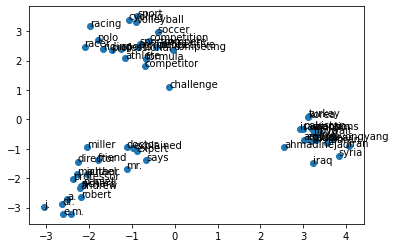

In [10]:
pc1 = principalComponents[:, 0]
pc2 = principalComponents[:, 1]
plt.scatter(pc1, pc2)
for label, x, y in zip(embedding_words_label, pc1, pc2):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.savefig('PCAResults2.png')
plt.show()